# Titanic Project

##### Problem Statement:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

## Import all needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

###### Read titanic file

In [2]:
titanic=pd.read_csv('titanic.csv')

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### About the columns:

1.PassengerId 

In this column unique ID for each passenger

2.Survived

In this column mention that passenger is survived are not.

3.Pclass

In this column contain passenger traveling class.

4.Name

In this column contain passenger name.

5.Sex

In this column contain the passenger gender.

6.Age 

In this column mention the passengers age.

7.SibSp

In this column mention the sibling counts.

8.Ticket

In this column contain the passenger ticket

9.Fare

In this column contain the embarkment points.

10.cabin 

In this column mention the passenger in cabin

11.Embarked

This is the Target column .It contain the sinking or not.

# Exploratory Data Analysis(EDA)

### Checking Shape of Titanic dataframe

In [5]:
titanic.shape

(891, 12)

There are 891 rows and 12 columns.

### Checking datatype

In [6]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

If you observe here Name,Sex,Ticket,cabin,Embarked is object type others are int and float.

In [7]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### checking space in data

In [8]:
for x in titanic.columns:
    print(titanic.loc[titanic[x]==" "])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cab

There is no space in dataframe

### Checking Null Values in DataFrame

In [9]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

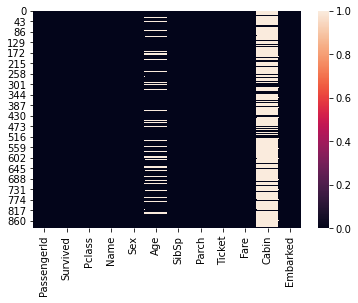

In [10]:
sns.heatmap(titanic.isnull())

### Handle the null values

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
simple_imputer=SimpleImputer(strategy='mean')

In [13]:
titanic['Age']=simple_imputer.fit_transform(titanic['Age'].values.reshape(-1,1))

In [14]:
simple_impute=SimpleImputer(strategy='most_frequent')

In [15]:
titanic['Cabin']=simple_impute.fit_transform(titanic['Cabin'].values.reshape(-1,1))

In [16]:
titanic['Embarked']=simple_impute.fit_transform(titanic['Embarked'].values.reshape(-1,1))

In [17]:
#checking null values
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


If you observe above 2 are float64 variables and 5 are int64 varibales and 5 are object variables.

Memory usage is 83.7+ KB

### Drop Name column(variable)

if you observe dataframe Name column are unique and if is not impact on target variable

In [19]:
titanic.drop('Name',axis=1,inplace=True)

In [20]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C148,C


### Checking Unique values of object variables

In [21]:
#change object variable to integer variable we use Label Encoder
from sklearn.preprocessing import LabelEncoder

In [22]:
label=LabelEncoder()

#### Sex variable

In [23]:
#checking unique values
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [24]:
#value counts 
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

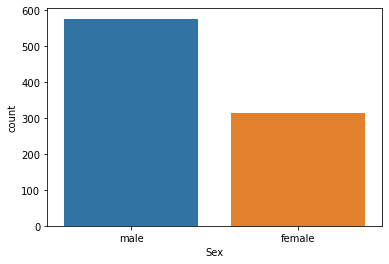

In [25]:
#using grap value counts
sns.countplot(titanic['Sex'])

In [26]:
#changing object to int32
titanic['Sex']=label.fit_transform(titanic['Sex'])

#### Cabin variable

In [27]:
titanic['Cabin'].unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [28]:
titanic['Cabin'].value_counts()

B96 B98        691
G6               4
C23 C25 C27      4
C22 C26          3
E101             3
              ... 
D9               1
A5               1
A19              1
A16              1
C128             1
Name: Cabin, Length: 147, dtype: int64

In [29]:
#convert object to int32
titanic['Cabin']=label.fit_transform(titanic['Cabin'])

#### Embarked variable(Target variable)

In [30]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [31]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

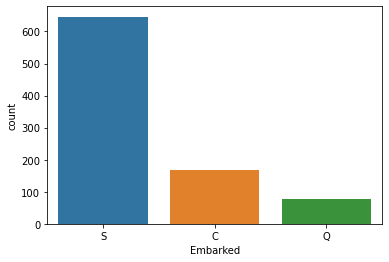

In [32]:
#countplot
sns.countplot(titanic['Embarked'])

In [33]:
#change object to int32
titanic['Embarked']=label.fit_transform(titanic['Embarked'])

#### Ticket variable

In [34]:
titanic['Ticket'].value_counts()

CA. 2343    7
1601        7
347082      7
3101295     6
CA 2144     6
           ..
349228      1
4138        1
350035      1
364512      1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [35]:
#change object to int32
titanic['Ticket']=label.fit_transform(titanic['Ticket'])

In [36]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Cabin            int32
Embarked         int32
dtype: object

Now , All are integers and float variables

## SMOTE

If you observe target variable there is imbalanced dataframe

In [37]:
titanic['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

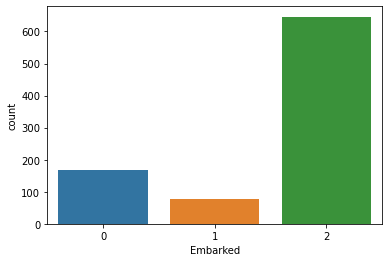

In [38]:
sns.countplot(titanic['Embarked'])

If you observe here ,There is imbalace in target variable

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
smt=SMOTE()

In [41]:
x=titanic.iloc[:,0:-1]

In [42]:
y=titanic.iloc[:,-1]

In [43]:
trainy_x,train_y=smt.fit_resample(x,y)

In [44]:
df=pd.DataFrame(trainy_x)

In [45]:
df['Embarked']=train_y

In [46]:
df.shape

(1938, 11)

In [47]:
df['Embarked'].value_counts()

0    646
1    646
2    646
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

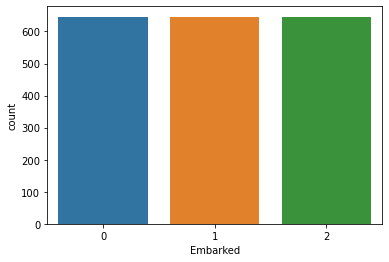

In [48]:
sns.countplot(df['Embarked'])

Now target variable is balanced

### Summary Statistics

In [49]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000
mean,433.285862,0.322497,2.365325,0.470072,29.464429,0.334365,0.224458,349.992776,32.111410,51.876161,1.000000
std,255.162521,0.467553,0.862022,0.499232,11.041965,0.847521,0.617822,187.321086,52.906172,19.813017,0.816707
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,209.000000,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,191.250000,7.854200,47.000000,0.000000
50%,428.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,391.000000,13.000000,47.000000,1.000000
75%,651.000000,1.000000,3.000000,1.000000,32.000000,0.000000,0.000000,478.000000,30.695800,47.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


In [50]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.063174,-0.043031,0.089844,0.013458,-0.058895,0.050598,-0.053385,0.036594,0.007169,0.011515
Survived,-0.063174,1.000000,-0.348830,-0.375545,-0.033657,-0.001275,0.088849,-0.165593,0.269493,0.206279,-0.055432
Pclass,-0.043031,-0.348830,1.000000,0.074604,-0.358022,0.051775,-0.016398,0.126787,-0.579024,-0.244006,0.239058
Sex,0.089844,-0.375545,0.074604,1.000000,0.085024,0.002920,-0.107929,0.031321,-0.127394,-0.087382,0.231714
Age,0.013458,-0.033657,-0.358022,0.085024,1.000000,-0.228168,-0.141068,-0.018773,0.140971,0.058935,-0.039339
SibSp,-0.058895,-0.001275,0.051775,0.002920,-0.228168,1.000000,0.380136,0.066467,0.104040,0.025956,0.173784
Parch,0.050598,0.088849,-0.016398,-0.107929,-0.141068,0.380136,1.000000,-0.004567,0.157531,0.034409,0.134033
Ticket,-0.053385,-0.165593,0.126787,0.031321,-0.018773,0.066467,-0.004567,1.000000,0.093978,-0.067101,0.018607
Fare,0.036594,0.269493,-0.579024,-0.127394,0.140971,0.104040,0.157531,0.093978,1.000000,0.115557,-0.230990
Cabin,0.007169,0.206279,-0.244006,-0.087382,0.058935,0.025956,0.034409,-0.067101,0.115557,1.000000,0.033883


Here Fare is highly negtive correlated and Pclass , Sex are postive correlation

<AxesSubplot:>

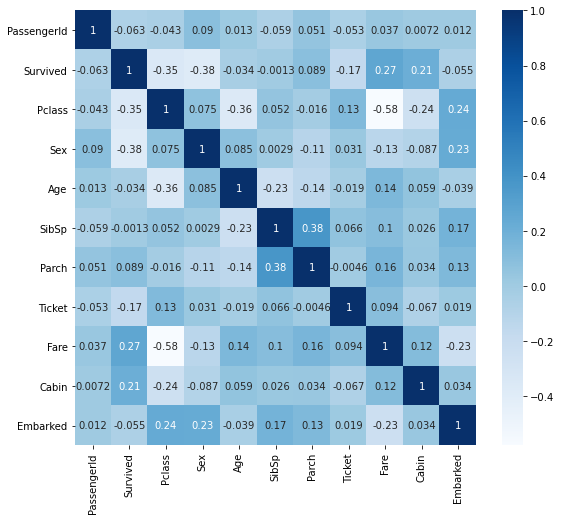

In [51]:
plt.figure(figsize=(9,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

##### Observations:

1.Fare is high negtive correlation

2.Sex and Pclass is high postive corrleation

3.SibSp and Ticket is also good corrleation

In [52]:
target_variable=df.corr()

In [53]:
target_variable['Embarked'].sort_values(ascending=False)

Embarked       1.000000
Pclass         0.239058
Sex            0.231714
SibSp          0.173784
Parch          0.134033
Cabin          0.033883
Ticket         0.018607
PassengerId    0.011515
Age           -0.039339
Survived      -0.055432
Fare          -0.230990
Name: Embarked, dtype: float64

    Here sex,pclass,sibsp,parch,ticket,cabin are postive correlation with target variable and passengerid,survived,age,fare are negitve correlation with target variable.

#### Scattor plots

<AxesSubplot:xlabel='PassengerId', ylabel='Embarked'>

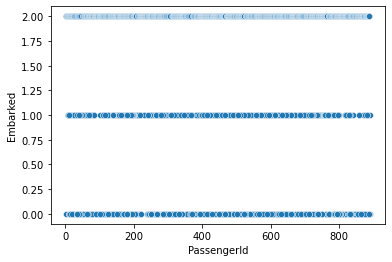

In [54]:
sns.scatterplot(x='PassengerId',y='Embarked',data=df)

Here idel correlation

<AxesSubplot:xlabel='Age', ylabel='Embarked'>

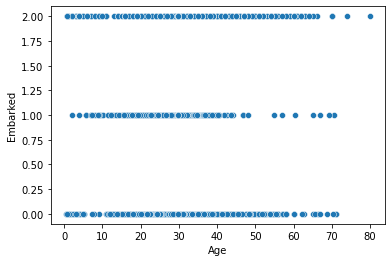

In [55]:
sns.scatterplot(x='Age',y='Embarked',data=df)

<AxesSubplot:xlabel='SibSp', ylabel='Embarked'>

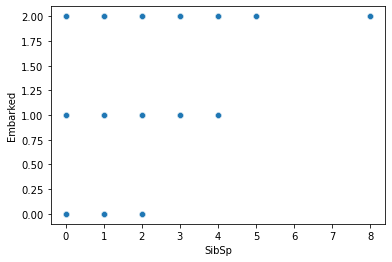

In [56]:
sns.scatterplot(x='SibSp',y='Embarked',data=df)

Here high sicking if high siblings

<AxesSubplot:xlabel='Parch', ylabel='Embarked'>

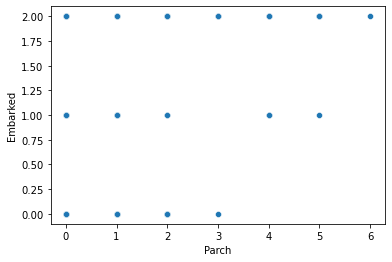

In [57]:
sns.scatterplot(x='Parch',y='Embarked',data=df)

<AxesSubplot:xlabel='Ticket', ylabel='Embarked'>

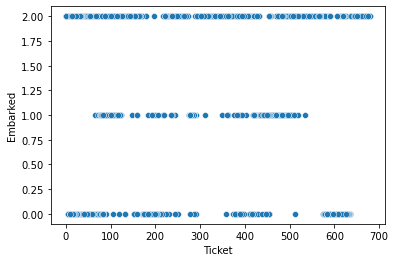

In [58]:
sns.scatterplot(x='Ticket',y='Embarked',data=df)

Here Sicking are many Tickets

<AxesSubplot:xlabel='Fare', ylabel='Embarked'>

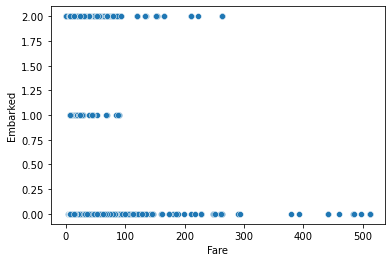

In [59]:
sns.scatterplot(x='Fare',y='Embarked',data=df)

Here Q are high Fare

<AxesSubplot:xlabel='Cabin', ylabel='Embarked'>

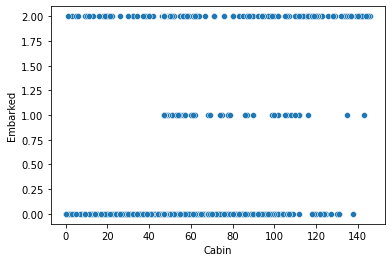

In [60]:
sns.scatterplot(x='Cabin',y='Embarked',data=df)

Here S and Q high are in cabin

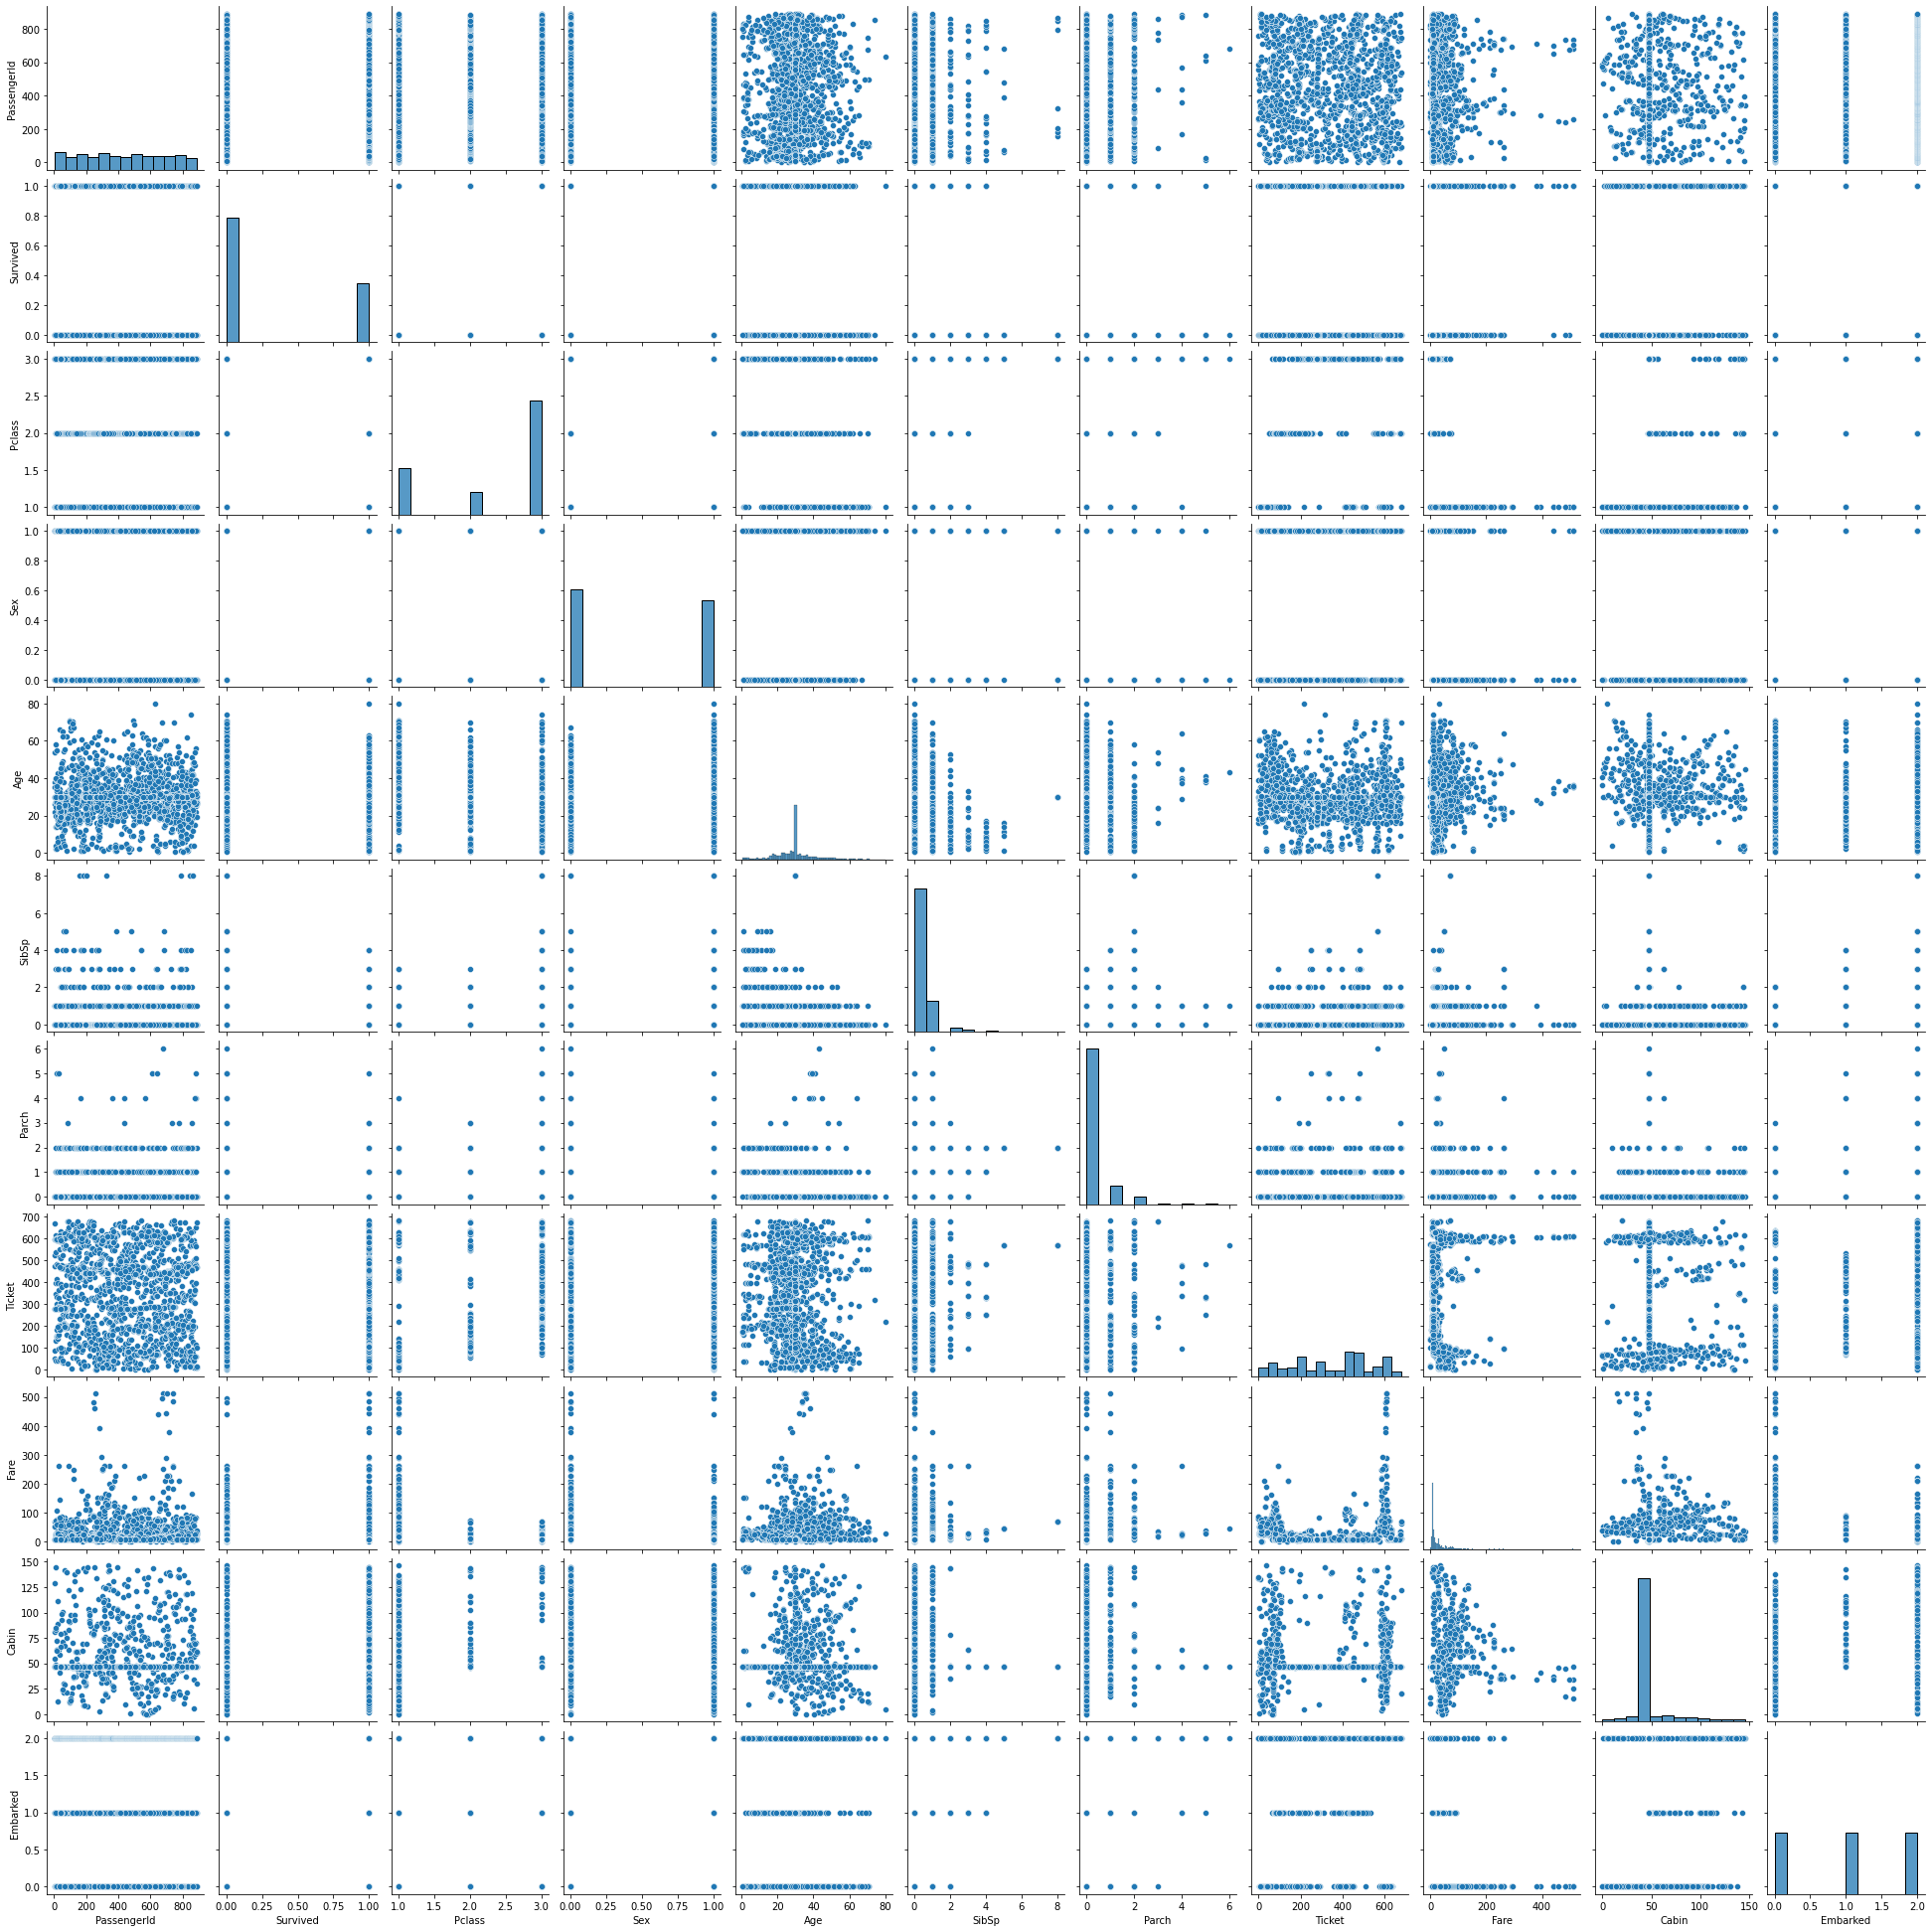

In [61]:
#pair plot
sns.pairplot(df)

#### Checking Outliers in cloumns

PassengerId        AxesSubplot(0.125,0.71587;0.227941x0.16413)
Survived        AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Pclass          AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Sex               AxesSubplot(0.125,0.518913;0.227941x0.16413)
Age            AxesSubplot(0.398529,0.518913;0.227941x0.16413)
SibSp          AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Parch             AxesSubplot(0.125,0.321957;0.227941x0.16413)
Ticket         AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Fare           AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Cabin                AxesSubplot(0.125,0.125;0.227941x0.16413)
Embarked          AxesSubplot(0.398529,0.125;0.227941x0.16413)
dtype: object

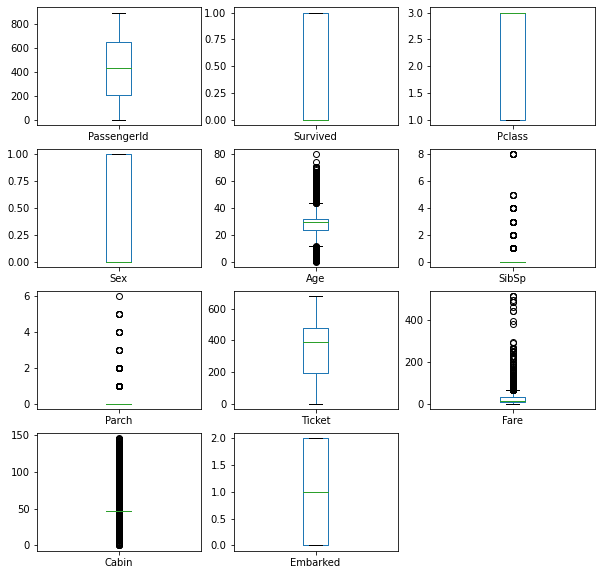

In [62]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,10))

#### Checking Skewness in all columns

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

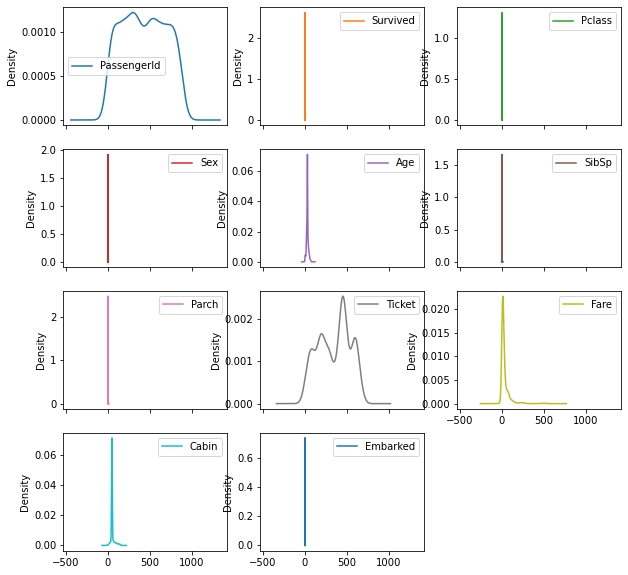

In [63]:
df.plot(kind='kde',subplots=True,layout=(4,3),figsize=(10,10))

In [64]:
#setting theme
sns.set_theme()

<AxesSubplot:xlabel='Embarked', ylabel='Sex'>

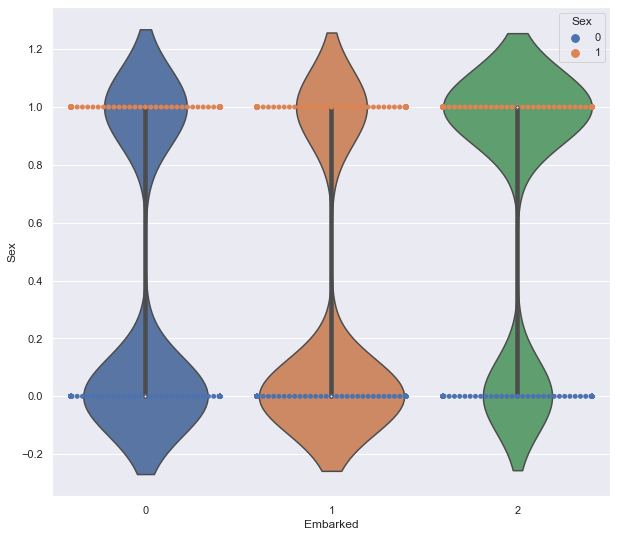

In [65]:
plt.figure(figsize=(10,9))
sns.swarmplot(x='Embarked',y='Sex',hue='Sex',data=df)
sns.violinplot(y='Sex',x='Embarked',data=df)

### Data Cleansing

Fare is highly negtive correlation with target variable so drop the Fare column

In [66]:
df.drop('Fare',axis=1,inplace=True)

#### Variance Inflation Factor(VIF)

In [67]:
x=df.iloc[:,0:-1]

In [68]:
x.shape

(1938, 9)

In [69]:
y=df.iloc[:,-1]

In [70]:
y.shape

(1938,)

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
def vif():
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return vif

In [73]:
vif()

,variables,VIF factor
0,PassengerId,3.666824
1,Survived,1.764726
2,Pclass,5.673993
3,Sex,2.178135
4,Age,6.334689
5,SibSp,1.408316
6,Parch,1.358068
7,Ticket,4.353678
8,Cabin,6.800924


if you observe here Age and Cabin variables are equal VIF ,So drop Cabin column

In [74]:
df.drop('Cabin',axis=1,inplace=True)

In [75]:
vif()

,variables,VIF factor
0,PassengerId,3.666824
1,Survived,1.764726
2,Pclass,5.673993
3,Sex,2.178135
4,Age,6.334689
5,SibSp,1.408316
6,Parch,1.358068
7,Ticket,4.353678
8,Cabin,6.800924


if you observe here sibsp and parch are equal VIF so, drop Parch column

In [76]:
df.drop('Parch',axis=1,inplace=True)

#### Removing outliers

In [77]:
from scipy.stats import zscore

In [78]:
z=np.abs(zscore(df))

In [79]:
threshold=3
print(np.where(z>3))

(array([   7,   16,   24,   27,   33,   50,   54,   59,   63,   68,   71,
         85,   88,   96,  116,  119,  159,  164,  171,  176,  180,  182,
        201,  229,  233,  261,  266,  275,  278,  280,  324,  341,  374,
        386,  409,  438,  456,  480,  483,  485,  493,  541,  542,  545,
        630,  634,  642,  672,  683,  686,  726,  745,  787,  792,  813,
        819,  824,  846,  850,  851,  863,  928,  929, 1011, 1142, 1149,
       1359, 1432, 1526, 1552, 1654, 1665, 1700, 1770, 1792, 1866, 1897,
       1905, 1908, 1914], dtype=int64), array([5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 4, 5, 4, 5, 4, 5, 5, 4,
       4, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4, 4, 4,
       4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5], dtype=int64))


In [80]:
z[7][5]

3.146025530016249

In [81]:
df_new=df[(z<3).all(axis=1)]

In [82]:
df_new.shape

(1858, 8)

After removing Outliers

In [83]:
df.shape

(1938, 8)

Before removing Outliers

In [84]:
df=df_new

In [85]:
df.shape

(1858, 8)

After removing Outliers

Here 1857 rows and 8 columns are there.

#### Removing Skewness

In [86]:
from scipy.stats import boxcox

In [87]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Ticket',
       'Embarked'],
      dtype='object')

In [88]:
df['PassengerId']=boxcox(df['PassengerId'],0)

#### Standard Scaler

In [94]:
x=df.iloc[:,0:-1]

In [95]:
x.shape

(1858, 7)

In [96]:
y=df.iloc[:,-1]

In [97]:
y.shape

(1858,)

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
scale=MinMaxScaler()

In [100]:
x=scale.fit_transform(x)

In [101]:
x.shape

(1858, 7)

### model selection process

import all classification models

In [116]:
#models
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=43)

In [155]:
x_train.shape

(1486, 7)

In [156]:
x_test.shape

(372, 7)

In [157]:
y_train.shape

(1486,)

In [158]:
y_test.shape

(372,)

In [159]:
mnb=MultinomialNB()
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
svc=SVC()

In [160]:
list1=[mnb,knc,dtc,svc]

In [161]:
for model in list1:
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print(accuracy_score(pred,y_test))
    print(confusion_matrix(pred,y_test))
    print(classification_report(pred,y_test))
    print('------>------>------>------>------->------->------->')

MultinomialNB()
0.49193548387096775
[[63 36 33]
 [18 57 12]
 [45 45 63]]
              precision    recall  f1-score   support

           0       0.50      0.48      0.49       132
           1       0.41      0.66      0.51        87
           2       0.58      0.41      0.48       153

    accuracy                           0.49       372
   macro avg       0.50      0.51      0.49       372
weighted avg       0.51      0.49      0.49       372

------>------>------>------>------->------->------->
KNeighborsClassifier()
0.8360215053763441
[[114   3  22]
 [  1 130  19]
 [ 11   5  67]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       139
           1       0.94      0.87      0.90       150
           2       0.62      0.81      0.70        83

    accuracy                           0.84       372
   macro avg       0.82      0.83      0.82       372
weighted avg       0.86      0.84      0.84       372

------>------>------>---

#### cross validation

In [162]:
for model in list1:
    score=cross_val_score(model,x,y,cv=5)
    print(model)
    print(score)
    print(score.mean())
    print('------->------->------->--------->------->-------->---------->------->')
    

MultinomialNB()
[0.4327957  0.57526882 0.5        0.54177898 0.57951482]
0.5258716633336231
------->------->------->--------->------->-------->---------->------->
KNeighborsClassifier()
[0.64247312 0.76075269 0.79301075 0.84366577 0.84366577]
0.7767136191055851
------->------->------->--------->------->-------->---------->------->
DecisionTreeClassifier()
[0.79032258 0.84946237 0.87634409 0.8490566  0.89218329]
0.8514737848882706
------->------->------->--------->------->-------->---------->------->
SVC()
[0.53494624 0.70430108 0.75268817 0.67385445 0.70619946]
0.6743978784453526
------->------->------->--------->------->-------->---------->------->


### Ensemble Methods

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [164]:
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [165]:
list2=[rfc,abc,gbc]

In [170]:
for model in list2:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(model)
    print(accuracy_score(pred,y_test))
    print(confusion_matrix(pred,y_test))
    print(classification_report(pred,y_test))
    print('----->------>------>------>------>------>----->----->------>')

RandomForestClassifier()
0.9301075268817204
[[118   1  11]
 [  1 135   4]
 [  7   2  93]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       130
           1       0.98      0.96      0.97       140
           2       0.86      0.91      0.89       102

    accuracy                           0.93       372
   macro avg       0.93      0.93      0.93       372
weighted avg       0.93      0.93      0.93       372

----->------>------>------>------>------>----->----->------>
AdaBoostClassifier()
0.739247311827957
[[ 71   2  12]
 [  1 118  10]
 [ 54  18  86]]
              precision    recall  f1-score   support

           0       0.56      0.84      0.67        85
           1       0.86      0.91      0.88       129
           2       0.80      0.54      0.65       158

    accuracy                           0.74       372
   macro avg       0.74      0.76      0.73       372
weighted avg       0.76      0.74      0.73       372

--

### cross validation

In [171]:
for model in list2:
    score=cross_val_score(model,x,y,cv=10)
    print(model)
    print(score)
    print(score.mean())
    print('------>----->-------->------>------>------>------->------->------->------->------>')

RandomForestClassifier()
[0.83870968 0.88709677 0.88709677 0.90860215 0.93548387 0.88172043
 0.91397849 0.91935484 0.92432432 0.83783784]
0.8934205172914851
------>----->-------->------>------>------>------->------->------->------->------>
AdaBoostClassifier()
[0.53225806 0.66129032 0.74731183 0.74731183 0.7688172  0.66666667
 0.72580645 0.66666667 0.71351351 0.57297297]
0.680261551874455
------>----->-------->------>------>------>------->------->------->------->------>
GradientBoostingClassifier()
[0.77956989 0.87096774 0.90322581 0.8655914  0.85483871 0.81182796
 0.83870968 0.88172043 0.8972973  0.74594595]
0.8449694856146468
------>----->-------->------>------>------>------->------->------->------->------>


### ROC Curve for RandomForestClassifier

In [172]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [173]:
pred_prob=rfc.predict_proba(x_test)

In [184]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

In [190]:
n_class=3

In [191]:
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

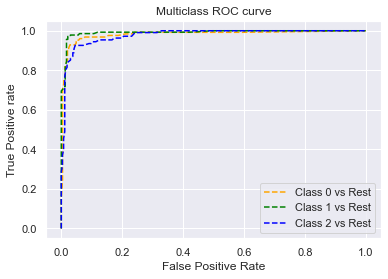

In [192]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

### ROC Curve for DecisionTreeClassifier

In [198]:
pred_prob=dtc.predict_proba(x_test)

In [200]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class=3

In [201]:
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

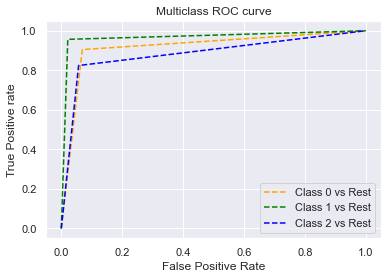

In [202]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

### Save the Model

In [203]:
import joblib

In [206]:
#save the model
joblib.dump(rfc,'titanicrfc.obj')

['titanicrfc.obj']

In [207]:
#load the model
titanic_load=joblib.load('titanicrfc.obj')

In [209]:
#checking that saved model is working or not
titanic_load.predict(x_test)

array([1, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0,
       0, 0, 2, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0,
       1, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 2, 1, 1,
       1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 2, 2, 2, 1,
       1, 1, 0, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1,
       1, 1, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0,
       2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 2,
       1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0,
       2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2,